# Part 1 of the Machine Learning Project

## Preliminaries


Before satring familiarize yourself with pandas reading the “10 minutes to pandas” tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Browse through the full pandas user guide when needed: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html


## Load libraries

Test on Markdown

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
from scipy import stats
import numpy as np

# File system manangement
import os

# Suppress warnings
#import warnings
#warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>


<h1>Datasets</h1>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Change this part with your own dataset files
previous_application = 'drive/MyDrive/Advanced_Machine_Learning/previous_application.csv'
src_bureau = 'drive/MyDrive/Advanced_Machine_Learning/bureau.csv'
src_bureau_balance = 'drive/MyDrive/Advanced_Machine_Learning/bureau_balance.csv'
src_train = 'drive/MyDrive/Advanced_Machine_Learning/application_train.csv'
src_test = 'drive/MyDrive/Advanced_Machine_Learning/application_test.csv'


# If you cannot load the directly the csv from Google drive (Google restrictions), download them manually then change the path to load them locally



<h1>Loading the datasets (2 pts)</h1>

1. Similarly to the train set, load the test set, the bureau dataset and the past applications dataset.

2. Display for each the number of rows and the number of columns

*You will be evaluated as follow*
* 1: Correct approach + code: 1pt
* 2: Code: 1pts


In [4]:
#Your code here
#The variables that should be implemented to store the data are: app_train, app_test, bureau, app_past


# 1 - Loading the different datasets.
prev_app = pd.read_csv(previous_application)
bureau = pd.read_csv(src_bureau)
bureau_balance = pd.read_csv(src_bureau_balance)
app_train = pd.read_csv(src_train)
app_test = pd.read_csv(src_test)

# 2 - The number of rows and columns for each
print(f'Number of rows and columns for previous application: {prev_app.shape}')
print(f'Number of rows and columns for bureau: {bureau.shape}')
print(f'Number of rows and columns for previous balance: {bureau_balance.shape}')
print(f'Number of rows and columns for train: {app_train.shape}')
print(f'Number of rows and columns for test: {app_test.shape}')


Number of rows and columns for previous application: (1670214, 37)
Number of rows and columns for bureau: (1716428, 17)
Number of rows and columns for previous balance: (27299925, 3)
Number of rows and columns for train: (307511, 122)
Number of rows and columns for test: (48744, 121)


<h1> Feature Engineering</h1>

<h2>Missing values (9pts)</h2>


**3.a**: What columns are missing the most values in app_test?

**3.b**: What columns are missing the most values in bureau?

**3.c**: What columns are missing the most values in app_past?

4: Fix missing data in app_test dataset using categorization and/or simple imputation when appropriate. Be careful to the **data leakage** issue!

*You will be evaluated as follow*
* 3: Correct approach + code 2pts.
* 4: Description of the approach 4pts. Code implementation of the approach 3pts.

In [5]:
# 3a missing values on app_test
missing_values = app_test.isnull().sum()
print(f'Columns with the most missing values: \n{missing_values.sort_values(ascending=False).head(5)}')

# 3b missing values on bureau
missing_values = bureau.isnull().sum()
print(f'Columns with the most missing values: \n{missing_values.sort_values(ascending=False).head(5)}')

## 3c
missing_values =  prev_app.isnull().sum()
print(f'Columns with the most missing values: \n{missing_values.sort_values(ascending=False).head(5)}')


Columns with the most missing values: 
COMMONAREA_AVG              33495
COMMONAREA_MODE             33495
COMMONAREA_MEDI             33495
NONLIVINGAPARTMENTS_AVG     33347
NONLIVINGAPARTMENTS_MODE    33347
dtype: int64
Columns with the most missing values: 
AMT_ANNUITY               1226791
AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
dtype: int64
Columns with the most missing values: 
RATE_INTEREST_PRIVILEGED    1664263
RATE_INTEREST_PRIMARY       1664263
AMT_DOWN_PAYMENT             895844
RATE_DOWN_PAYMENT            895844
NAME_TYPE_SUITE              820405
dtype: int64


In [6]:
# 4: Fix missing data in app_test using categorization and/or simple imputation when appropriate. You should use *only* pandas and numpy here. You should *not* use sklearn (scikit-learn).

## Your code here

## Get the column names to iterate through them
columns_names = app_test.columns.tolist()

## Check for skewness to decide which is the 'best' way to fix missing vlaues
# for column in columns_names:
#   if app_test[column].dtype == 'float64' or app_test[column].dtype == 'numerical' or app_test[column].dtype == 'int':
#     print(app_test[column].skew())

## Fill NaN numerical columns whith MEDIAN value
for column in columns_names:
  if app_test[column].dtype == 'float64' or app_test[column].dtype == 'numerical' or app_test[column].dtype == 'int':
    app_test[column] = app_test[column].fillna(app_test[column].median())


## Fill NaN categorical columns with "Not specified" value
categorical_missing = app_test.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
categorical_missing = categorical_missing[categorical_missing > 0]
categorical_missing = categorical_missing.index.tolist()

for column in categorical_missing:
  app_test[column] = app_test[column].fillna('not specified')


## Check if there is a column with missing values after fixing them
app_test.isnull().sum().sort_values(ascending=True)




,0
SK_ID_CURR,0
TOTALAREA_MODE,0
HOUSETYPE_MODE,0
FONDKAPREMONT_MODE,0
NONLIVINGAREA_MEDI,0
...,...
REG_REGION_NOT_LIVE_REGION,0
HOUR_APPR_PROCESS_START,0
WEEKDAY_APPR_PROCESS_START,0
YEARS_BEGINEXPLUATATION_MODE,0


**4**: Describe your approach, including how you choose the technique to apply, and how you apply the technique (double click to edit a text cell)

---

Here I decided to fill the null values with the mean in the case of the numerical values and for categorical values I decided to add the 'not specified' value, since there was already a value named like this.
And in the case of the numerical values, the skewness was verified, and since most of the data was skewed the MEDIAN was a better way to fill the missing values.

## Class Imbalance (8 pts)

5. Evaluate the class imbalance of the training set.

6. **a** Fix the class imbalance with over/undersampling

 **b** Use the SMOTE algorithm to fix class imbalance

*You will be evaluated as follow*
* 5: Correct approach + code: 2ts
* 6.a: code 3pt
* 6.b: code 3pts

TARGET
0    282686
1     24825
Name: count, dtype: int64
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


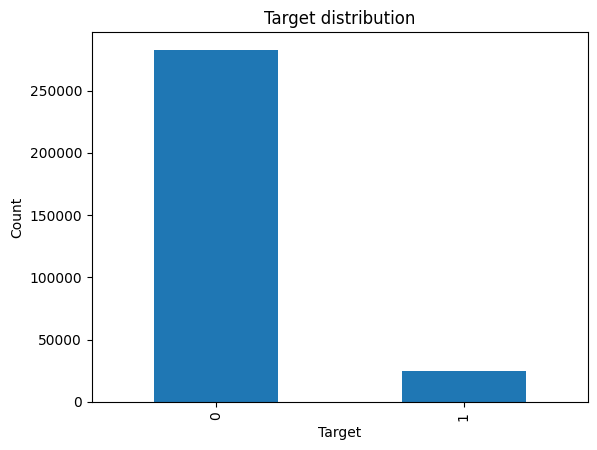

In [7]:
## Checking class imbalance on 'TARGET' column
# 5 - value counts
print(app_train['TARGET'].value_counts())
print(app_train['TARGET'].value_counts(normalize = True) *100)

# 5 - histograms
app_train['TARGET'].value_counts().plot(kind='bar')
plt.title('Target distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

TARGET
0    24825
1    24825
Name: count, dtype: int64


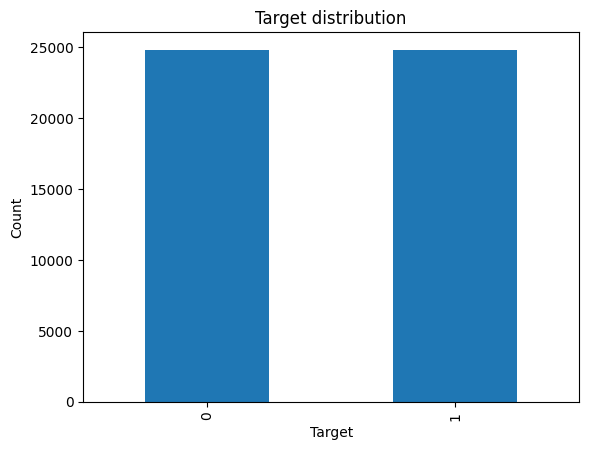

In [8]:
# 6.a Fix the class imbalance with over/undersampling
app_train_copy = app_train.copy()

majority_class = app_train_copy[app_train_copy['TARGET'] == app_train_copy['TARGET'].value_counts().idxmax()]
minority_class = app_train_copy[app_train_copy['TARGET'] == app_train_copy['TARGET'].value_counts().idxmin()]

majority_undersampled = majority_class.sample(n = len(minority_class), random_state = 42)
undersampled = pd.concat([majority_undersampled, minority_class])

print(undersampled['TARGET'].value_counts())

undersampled['TARGET'].value_counts().plot(kind='bar')
plt.title('Target distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [9]:
# # 6.b Use the SMOTE algorithm to fix class imbalance
## import SMOTE library
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
## Create another copy of app_train dataframe
app_train_copy2 = app_train.copy()


SMOTE algorithm can not wor with missing values, then we have to change them

In [10]:
## Get the column names to iterate through them
columns_names = app_train_copy2.columns.tolist()
## Fill NaN numerical columns whith MEDIAN value
for column in columns_names:
  if app_train_copy2[column].dtype == 'float64' or app_train_copy2[column].dtype == 'numerical' or app_train_copy2[column].dtype == 'int':
    app_train_copy2[column] = app_train_copy2[column].fillna(app_train_copy2[column].median())


## Fill NaN categorical columns with "Not specified" value
categorical_missing = app_train_copy2.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
categorical_missing = categorical_missing[categorical_missing > 0]
categorical_missing = categorical_missing.index.tolist()

for column in categorical_missing:
  app_train_copy2[column] = app_train_copy2[column].fillna('not specified')


## Check if there is a column with missing values after fixing them
app_train_copy2.isnull().sum().sort_values(ascending=True)

,0
SK_ID_CURR,0
TOTALAREA_MODE,0
HOUSETYPE_MODE,0
FONDKAPREMONT_MODE,0
NONLIVINGAREA_MEDI,0
...,...
REG_REGION_NOT_LIVE_REGION,0
HOUR_APPR_PROCESS_START,0
WEEKDAY_APPR_PROCESS_START,0
REGION_RATING_CLIENT,0


In [11]:
# Separate features (X) and target (y)
X = app_train_copy2.drop(columns=['TARGET'])  # Assuming 'TARGET' is your class column
y = app_train_copy2['TARGET']

y.value_counts()



,count
TARGET,
0,282686
1,24825


After SMOTE, class distribution:
TARGET
0    282686
1     84805
Name: count, dtype: int64


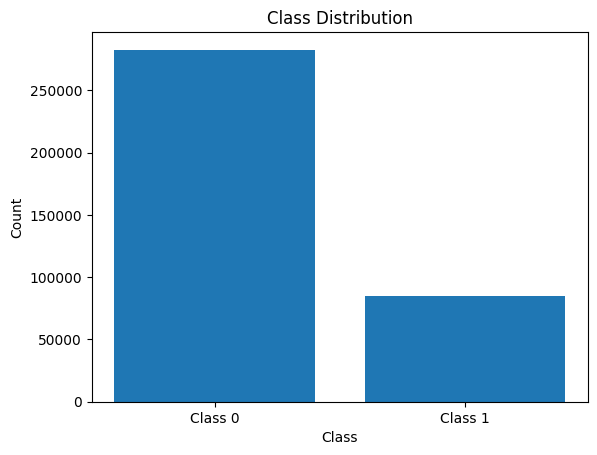

In [12]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns



# Preprocessing: OneHotEncoding for categorical and scaling for numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

smote = SMOTE(sampling_strategy = 0.3, k_neighbors = 5, random_state = 100)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Now X_resampled and y_resampled hold the balanced data
print("After SMOTE, class distribution:")
print(pd.Series(y_resampled).value_counts())

count_class = y_resampled.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()

**5**: Describe briefly your observation (double click to edit a text cell)

Its better to create copies of the datframe since we can make mistakes, knowing this for the first approach we selected the majorty and minority class, and then decide to undersample the data, this part did not require any data handling since we were working with just the TARGET column.

For the use of SMOTE we have to make data handling since the algorithm does not support missing values, therefore we apply the same solution coded in missing values for app_test, this gave us the solution we needed for missing values, furthermore the algorithm does not support categorical values, this is the main reason to use one-hot encoding, changing this categorical values to numerical ones. then the algorithm could be applied, and as shown in the plot, the algorithm was applied correctly.

<h2>Categorical features (9pts)</h2>

In `app_test`

**7a**: How will you transform the column NAME_HOUSING_TYPE in app_test be correctly handled by the model? How will you transform CODE_GENDER column?

**7b**: How would you transform the column NAME_HOUSING_TYPE in app_test if you want only 3 categories? Use LabelEncoder to transform FLAG_OWN_CAR column.

**7c**: In ORGANIZATION_TYPE, only keep the categories that appear in more than 10% of the dataset. Group other categories in one. What is the size of the dummy vector for ORGANIZATION_TYPE after this transformation?


8: **In app_test, app_past and bureau,** transform all the categorical columns that you have not processed in 7 using One-hot encoding.

*You will be evaluated as follow*
* 7: Description of the approach 4pts. Code 3pts.
* 8: Correct approach + code 2pts.

In [13]:
##7a Transforming NAME_HOUSING_TYPE and CODE_GENDER
from sklearn.preprocessing import LabelEncoder
app_test_copy = app_test.copy()
## For the NAME_HOUSING_TYPE column we can use one hot encoding to do this task
app_test_copy['NAME_HOUSING_TYPE'].unique()
# Perform one-hot encoding using Pandas
one_hot_encoded = pd.get_dummies(app_test_copy, columns=['NAME_HOUSING_TYPE'],dtype=int)

# For CODE_GENDER column since there is just two values we can change Male=0 and Female=1 or viceversa with label encoder
label_encoder =  LabelEncoder()
app_test_copy['CODE_GENDER'] = label_encoder.fit_transform(app_test_copy['CODE_GENDER'])

In [14]:
##7b NAME_HOUSING_TYPE for only 3 categories
# app_test_copy = app_test.copy()

# app_test_copy['NAME_HOUSING_TYPE'].value_counts()

## Encoding FLAG_OWN_CAR
app_test_copy['FLAG_OWN_CAR'] = label_encoder.fit_transform(app_test_copy['FLAG_OWN_CAR'])
app_test_copy['FLAG_OWN_CAR'].unique()

array([0, 1])

In [15]:
## 7c
threshold = 0.1
count_threshold = len(app_test_copy) * threshold
print(count_threshold)

## Checking which of the features meet the threshold
category_counts = app_test_copy['ORGANIZATION_TYPE'].value_counts()
valid_categories = category_counts[category_counts > count_threshold].index

app_test_copy['ORGANIZATION_TYPE'] = app_test_copy['ORGANIZATION_TYPE'].apply(lambda x: x if x in valid_categories else 'Other')

dummy_vector = pd.get_dummies(app_test_copy['ORGANIZATION_TYPE'], prefix = 'ORG', dtype=int)
print(f'Dummy shape: {dummy_vector.shape}')



4874.400000000001
Dummy shape: (48744, 4)


In [16]:
## 8 app_test, app_past, bureau
app_test_copy = app_test.copy()
app_past_copy = prev_app.copy()
bureau_copy = bureau.copy()

categorical_cols_appTest = app_test_copy.select_dtypes(include=['object']).columns
categorical_cols_appPast = app_past_copy.select_dtypes(include=['object']).columns
categorical_cols_bureau = bureau_copy.select_dtypes(include=['object']).columns

one_hot_encoded_appTest = pd.get_dummies(app_test_copy, columns=categorical_cols_appTest, dtype=int)
one_hot_encoded_appPast = pd.get_dummies(app_past_copy, columns=categorical_cols_appPast, dtype=int)
one_hot_encoded_bureau = pd.get_dummies(bureau_copy, columns=categorical_cols_bureau, dtype=int)

In [17]:
one_hot_encoded_appTest.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_not specified,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_not specified
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,1,0,0,1,0,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0,0,1,0,0,1
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0,0,0,1,0,0,1
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,1,0,0,0,1,0,0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,0,0,0,1,0,0,1


<h2>Anomalies (7 pts)</h2>

**In app_test**

**9a**: Is there an anomaly with the column DEF_30_CNT_SOCIAL_CIRCLE? If so, how would you solve it?

**9b**: Is there an anomaly with the column LANDAREA_AVG? If so, how would you solve it?

**9c**: Is there an anomaly with the column AMT_INCOME_TOTAL? If so, how would you solve it?

10: Fix the anomaly in DAYS_EMPLOYED?

*You will be evaluated as follow*
* 9: Description of the approach + code 5pts.
* 10: code 2pts

In [31]:
## Your code here
## 9a Check anomalies on DEF_30_CNT_SOCIAL_CIRCLE
app_test_copy = app_test.copy()
print(app_test_copy.dtypes['DEF_30_CNT_SOCIAL_CIRCLE'])
print(app_test_copy['DEF_30_CNT_SOCIAL_CIRCLE'].unique())
print(app_test_copy['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts())
app_test_copy['DEF_30_CNT_SOCIAL_CIRCLE'].describe()


float64
[ 0.  1.  2.  3.  4.  5.  6. 34.]
DEF_30_CNT_SOCIAL_CIRCLE
0.0     43224
1.0      4443
2.0       834
3.0       189
4.0        40
5.0         8
6.0         3
34.0        3
Name: count, dtype: int64


,DEF_30_CNT_SOCIAL_CIRCLE
count,48744.000000
mean,0.143566
std,0.514272
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,34.000000


We can detect anomalies seeing them on an histogram or a boxplot, but sometimes is not easy to see them, then above we can see that there are outliers on our dataset, having 3 datapoints with a high value of 34 and a lot of data points with 0 as a value

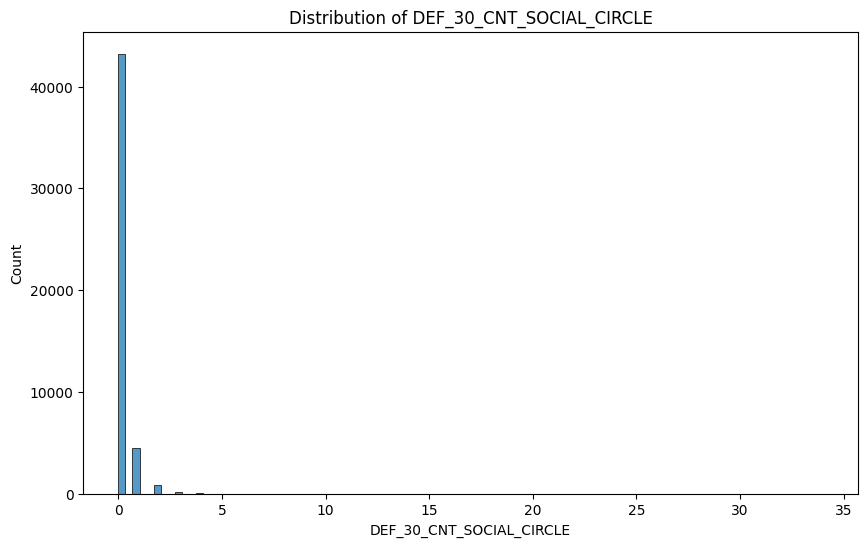

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


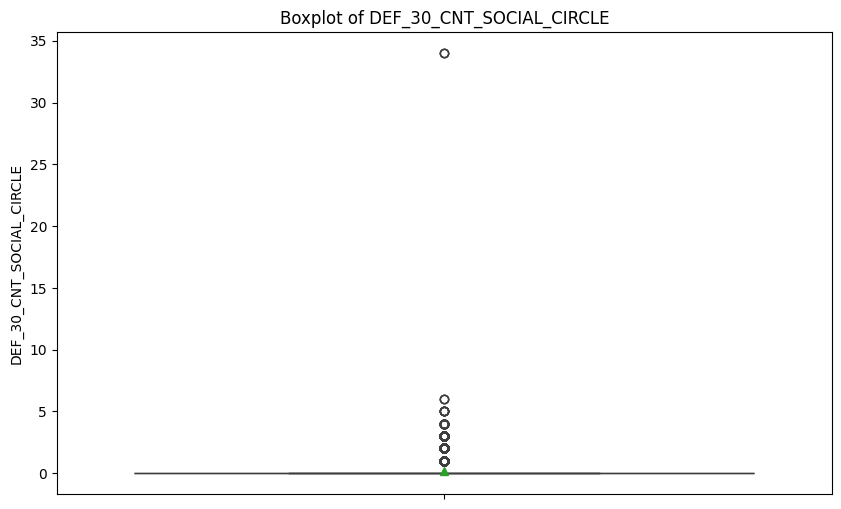

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10,6))
sns.histplot(app_test_copy['DEF_30_CNT_SOCIAL_CIRCLE'], bins=100)
plt.title('Distribution of DEF_30_CNT_SOCIAL_CIRCLE')
plt.show()

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(app_test_copy['DEF_30_CNT_SOCIAL_CIRCLE'], showmeans = True)
plt.title('Boxplot of DEF_30_CNT_SOCIAL_CIRCLE')
plt.show()


We can also detect anomalies with a Z-Score calculation, this can give us an idea where are the anomalies.

In [33]:
# Z-score calculation
z_scores = np.abs(stats.zscore(app_test_copy['DEF_30_CNT_SOCIAL_CIRCLE']))

# Threshold for anomaly
threshold = 3
anomalies = app_test_copy[z_scores > threshold]

print("Anomalies detected using Z-score:")
print(anomalies['DEF_30_CNT_SOCIAL_CIRCLE'])

Anomalies detected using Z-score:
25       2.0
111      3.0
123      2.0
138      3.0
213      2.0
        ... 
48464    2.0
48486    2.0
48495    2.0
48566    3.0
48628    2.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, Length: 1077, dtype: float64


Another method we can use is the inter quantile data.

In [34]:
Q1 = app_test_copy['DEF_30_CNT_SOCIAL_CIRCLE'].quantile(0.25)
Q3 = app_test_copy['DEF_30_CNT_SOCIAL_CIRCLE'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding outliers
anomalies = app_test_copy[(app_test_copy['DEF_30_CNT_SOCIAL_CIRCLE'] < lower_bound) | (app_test_copy['DEF_30_CNT_SOCIAL_CIRCLE'] > upper_bound)]

print("Anomalies detected using IQR:")
print(anomalies['DEF_30_CNT_SOCIAL_CIRCLE'])


Anomalies detected using IQR:
12       1.0
25       2.0
27       1.0
37       1.0
56       1.0
        ... 
48566    3.0
48628    2.0
48676    1.0
48702    1.0
48714    1.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, Length: 5520, dtype: float64


Detect the anomalies uding the Isolation forest technic

In [35]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
isolation_forest = IsolationForest(contamination=0.01)

# Fit and predict anomalies (-1 means anomaly, 1 means normal)
app_test_copy['anomaly'] = isolation_forest.fit_predict(app_test_copy[['DEF_30_CNT_SOCIAL_CIRCLE']])

# Filter out anomalies
anomalies = app_test_copy[app_test_copy['anomaly'] == -1]

print("Anomalies detected using Isolation Forest:")
anomalies['DEF_30_CNT_SOCIAL_CIRCLE']


Anomalies detected using Isolation Forest:


,DEF_30_CNT_SOCIAL_CIRCLE
111,3.0
138,3.0
222,4.0
329,3.0
342,3.0
...,...
47815,3.0
47892,3.0
48155,3.0
48374,3.0


## How can we deal with the anomalies?

We can apply one of this methods:

*   Remove the anomalies
*   Impute or replace the values
*   Cap the anomalies
*   Transform the data
*   Flag and treat them separately



In [36]:
median = app_test_copy['DEF_30_CNT_SOCIAL_CIRCLE'].median()
print(median)

0.0


In [37]:
print(f'lower bound: {lower_bound} upper bound: {upper_bound}')

lower bound: 0.0 upper bound: 0.0


Since the median and the quartiles are both 0 we can choose to transform or delete the data.

First we will try with *TRANSFORMING* the data.

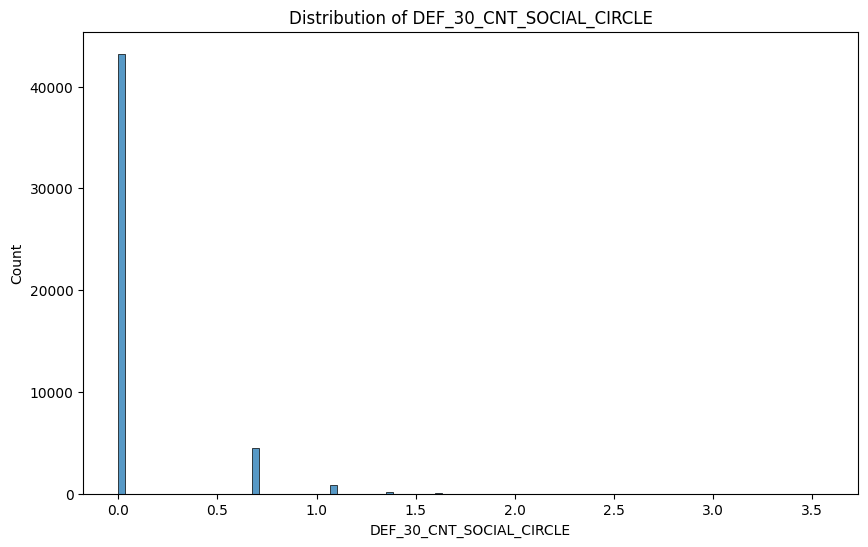

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


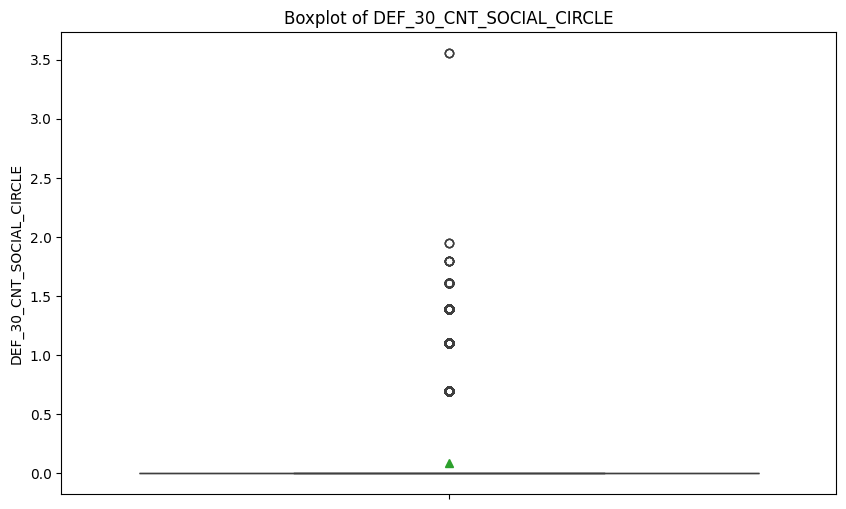

,DEF_30_CNT_SOCIAL_CIRCLE
count,48744.000000
mean,0.089306
std,0.259971
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.555348


In [48]:
app_test_copy_transformed = app_test_copy.copy()
app_test_copy_transformed['DEF_30_CNT_SOCIAL_CIRCLE'] = np.log1p(app_test_copy['DEF_30_CNT_SOCIAL_CIRCLE'])

# Histogram
plt.figure(figsize=(10,6))
sns.histplot(app_test_copy_transformed['DEF_30_CNT_SOCIAL_CIRCLE'], bins=100)
plt.title('Distribution of DEF_30_CNT_SOCIAL_CIRCLE')
plt.show()

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(app_test_copy_transformed['DEF_30_CNT_SOCIAL_CIRCLE'], showmeans = True)
plt.title('Boxplot of DEF_30_CNT_SOCIAL_CIRCLE')
plt.show()

app_test_copy_transformed['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

*Deleting* the anomalies

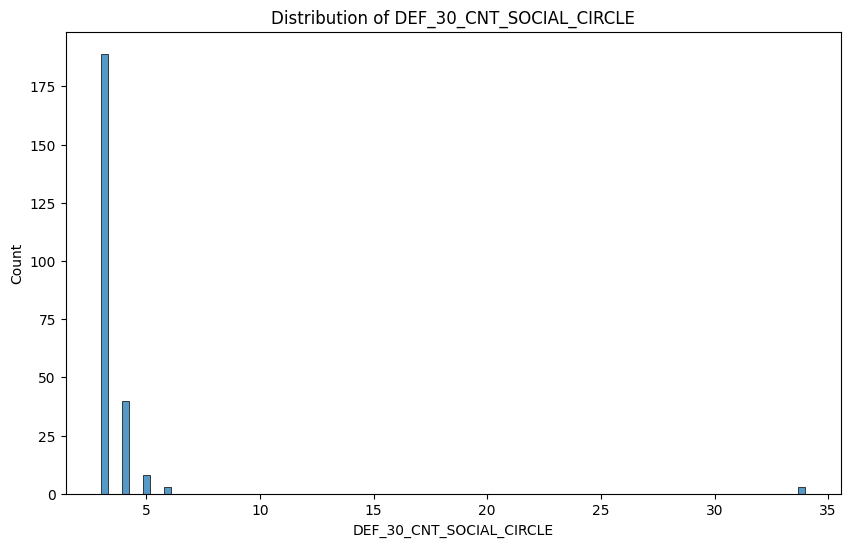

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


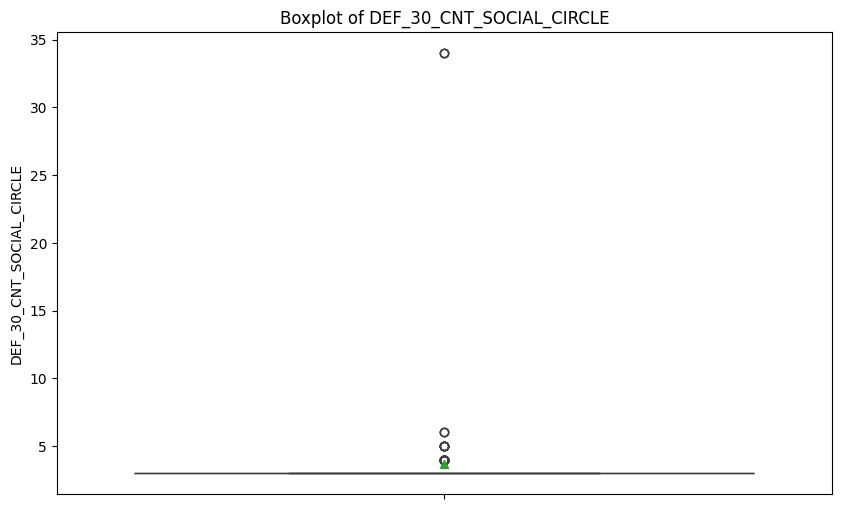

In [45]:
app_test_copy_cleaned = app_test_copy[app_test_copy['anomaly'] != 1]

plt.figure(figsize=(10,6))
sns.histplot(app_test_copy_cleaned['DEF_30_CNT_SOCIAL_CIRCLE'], bins=100)
plt.title('Distribution of DEF_30_CNT_SOCIAL_CIRCLE')
plt.show()

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(app_test_copy_cleaned['DEF_30_CNT_SOCIAL_CIRCLE'], showmeans = True)
plt.title('Boxplot of DEF_30_CNT_SOCIAL_CIRCLE')
plt.show()

In [47]:
app_test_copy_cleaned['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()
app_test_copy_cleaned['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

,DEF_30_CNT_SOCIAL_CIRCLE
count,243.000000
mean,3.650206
std,3.449319
min,3.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,34.000000


# Conclusion

As I saw I would chose the data transformation using log since it does not delete most of the data.

**9b**: Is there an anomaly with the column LANDAREA_AVG? If so, how would you solve it?

In [119]:
app_test_copy = app_test.copy()
app_test_copy['LANDAREA_AVG'].value_counts()

,count
LANDAREA_AVG,
0.0483,28272
0.0000,2656
0.0141,37
0.0158,33
0.0114,33
...,...
0.2692,1
0.2514,1
0.1364,1


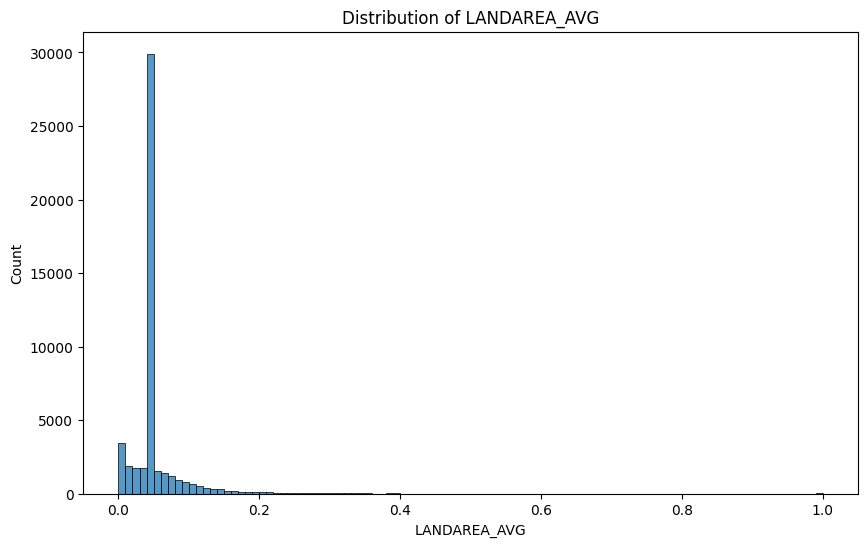

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


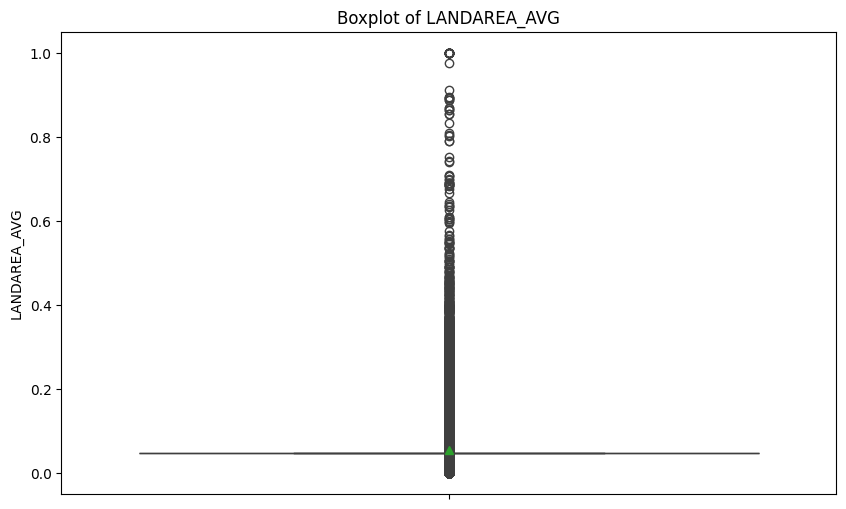

In [120]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(app_test_copy['LANDAREA_AVG'], bins=100)
plt.title('Distribution of LANDAREA_AVG')
plt.show()

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(app_test_copy['LANDAREA_AVG'], showmeans = True)
plt.title('Boxplot of LANDAREA_AVG')
plt.show()

We can notice that 0.000 holds 2656 entries this could mean the values are missing and we can replace them with the median value

In [121]:
app_test_copy['LANDAREA_AVG'] = app_test_copy['LANDAREA_AVG'].replace(0.000, app_test_copy['LANDAREA_AVG'].median())
app_test_copy['LANDAREA_AVG'].value_counts()

,count
LANDAREA_AVG,
0.0483,30928
0.0141,37
0.0158,33
0.0114,33
0.0316,32
...,...
0.2692,1
0.2514,1
0.1364,1


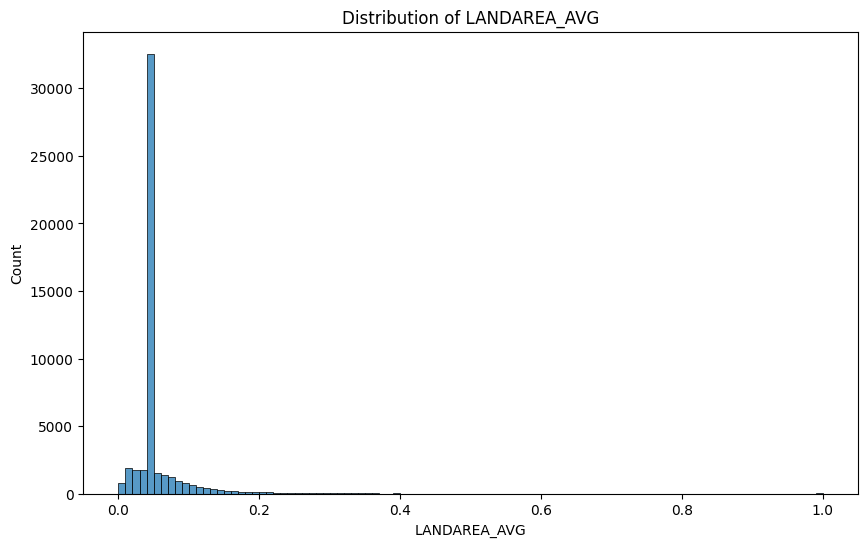

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


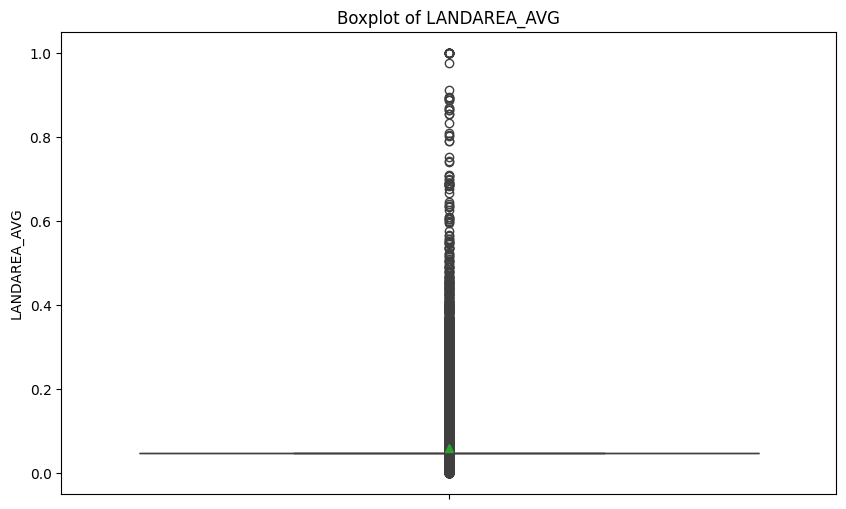

In [129]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(app_test_copy['LANDAREA_AVG'], bins=100)
plt.title('Distribution of LANDAREA_AVG')
plt.show()

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(app_test_copy['LANDAREA_AVG'], showmeans = True)
plt.title('Boxplot of LANDAREA_AVG')
plt.show()

**9c**: Is there an anomaly with the column AMT_INCOME_TOTAL? If so, how would you solve it?

In [151]:
app_test_copy = app_test.copy()
app_test_copy['AMT_INCOME_TOTAL'].value_counts()

#app_test_copy['AMT_INCOME_TOTAL'].describe()

,count
AMT_INCOME_TOTAL,
135000.0,5562
112500.0,4851
157500.0,4435
180000.0,4205
225000.0,3764
...,...
114219.0,1
84717.0,1
91935.0,1


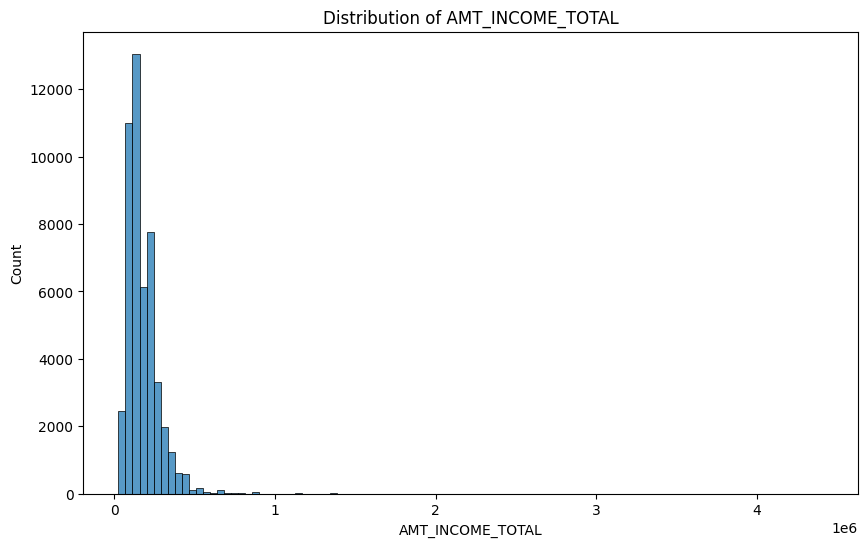

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


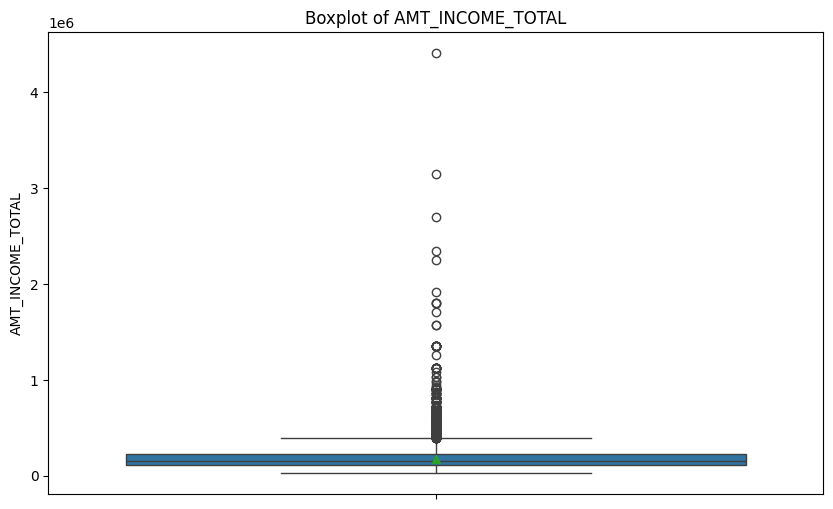

In [152]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(app_test_copy['AMT_INCOME_TOTAL'], bins=100)
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.show()

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(app_test_copy['AMT_INCOME_TOTAL'], showmeans = True)
plt.title('Boxplot of AMT_INCOME_TOTAL')
plt.show()

In [181]:
# Calculate IQR
Q1 = app_test_copy['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = app_test_copy['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

app_test_copy['AMT_INCOME_TOTAL_boxcox'], fitted_lambda = stats.boxcox(app_test_copy['AMT_INCOME_TOTAL'] + 1e-6)

# Filter the anomalies
z_scores = np.abs(stats.zscore(app_test_copy['AMT_INCOME_TOTAL']))

# Set threshold for anomaly (e.g., Z > 3)
threshold = 3
anomalies = app_test_copy[z_scores > threshold]

# Print the 'DEF_30_CNT_SOCIAL_CIRCLE' values for the anomalies
print(anomalies['AMT_INCOME_TOTAL'])


93        495000.0
188       540000.0
262       675000.0
584       607500.0
772      1350000.0
           ...    
48313     675000.0
48395     486000.0
48407     495000.0
48425     517500.0
48481     675000.0
Name: AMT_INCOME_TOTAL, Length: 571, dtype: float64


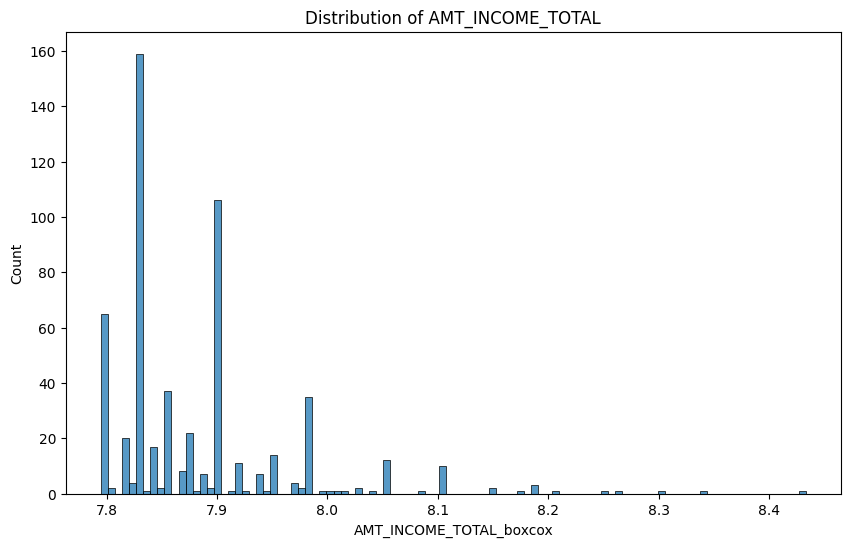

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


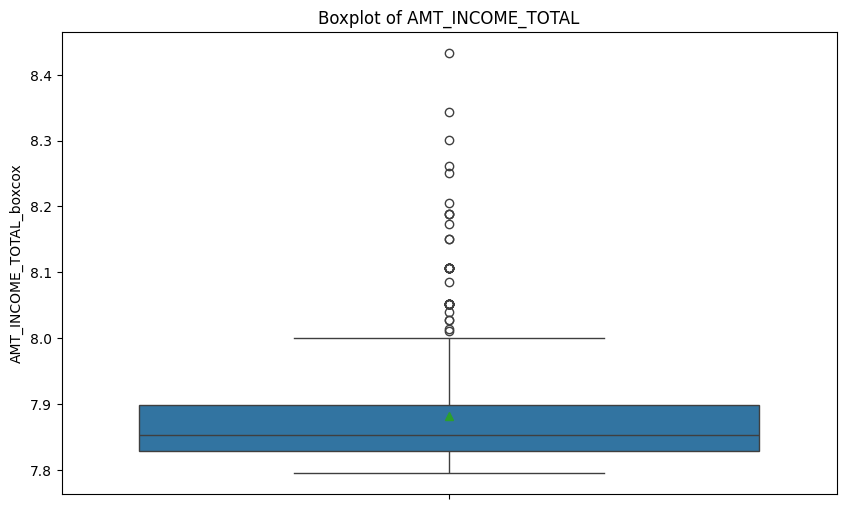

In [182]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(anomalies['AMT_INCOME_TOTAL_boxcox'], bins=100)
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.show()

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(anomalies['AMT_INCOME_TOTAL_boxcox'], showmeans = True)
plt.title('Boxplot of AMT_INCOME_TOTAL')
plt.show()

In [149]:
app_test_copy['AMT_INCOME_TOTAL'].value_counts()

,count
AMT_INCOME_TOTAL,
135000.0,5562
157500.0,4920
112500.0,4851
180000.0,4205
225000.0,3764
...,...
280800.0,1
180234.0,1
198292.5,1


<h2>Correlations (9 pts)</h2>


11: **In app_test**, remove the collinear features of the dataset. How did you choose the threshold?

12: What features from bureau.csv could you use to improve the training set? Use the random forest model from the notebook of the Lecture to check if it actually improves the final model performance.

*You will be evaluated as follow*
* 11: Code 3pts. Threshold explanation 1pt.
* 12: Description of the approach 1pt. Code implementation of the approach 2pts. Improved performance 2pts.

In [26]:
## Your code here

##  Class imbalance and model performances (6 points)


**13**: Evaluate the other technique (SMOTE) to handeling imbalance data left in *6.b*. Does it makes a difference on the final model performance? Can you use the performance on the test set to choose which techniques to use? If not, what would you need to do so?

*You will be evaluated as follow*
* 13: Code 3pts. Explanation 3pts.


In [27]:
## Your code here

**13**: Answer the question here (double click to edit a text cell)

